In [1]:
import pyemma as pm
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import functions as funcs
import pickle
import time
import seaborn as sns

# Introduction

This plots the implied timescales and timescale ratios

In [2]:
ts = pd.read_hdf('./summaries/ts_bs_summary.h5')
ts_ratio = pd.read_hdf('./summaries/ts_ratio_bs_summary.h5')

In [3]:
m1_selection = pd.read_hdf('./summaries/m1_model_selection.h5')
m2_selection = pd.read_hdf('./summaries/m2_model_selection.h5')

In [4]:
chosen_lags = pd.read_hdf('chosen_lag_times.h5')
chosen_ks = pd.read_hdf('chosen_num_dominant.h5')

In [6]:
m1_selection.sort_values(by=['protein', 'median_vamp'], ascending=False, inplace=True)
m2_selection.sort_values(by=['protein', 'median_vamp'], ascending=False, inplace=True)

In [8]:
model_selections = {'m1': m1_selection, 'm2': m2_selection}

# Figure 1

The implied timescales and timescale ratios for each model

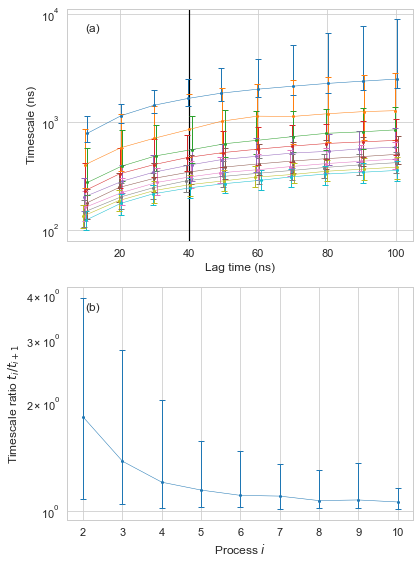

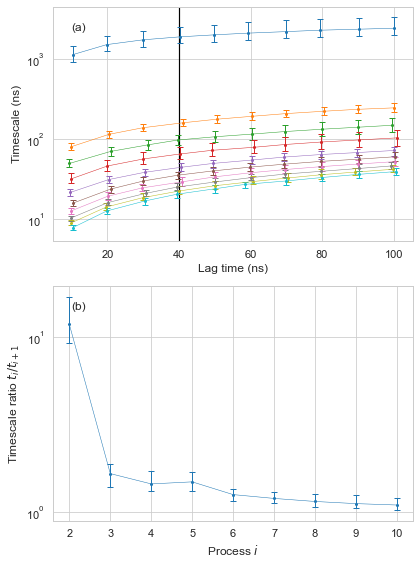

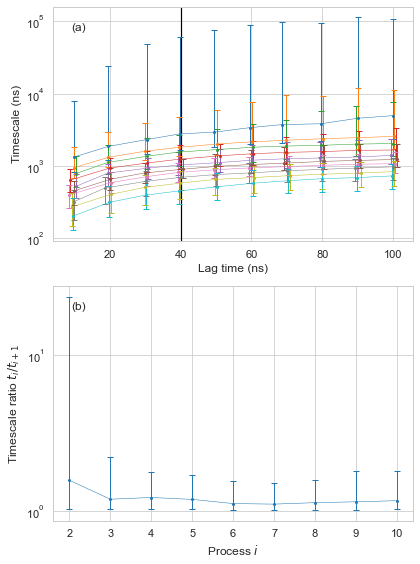

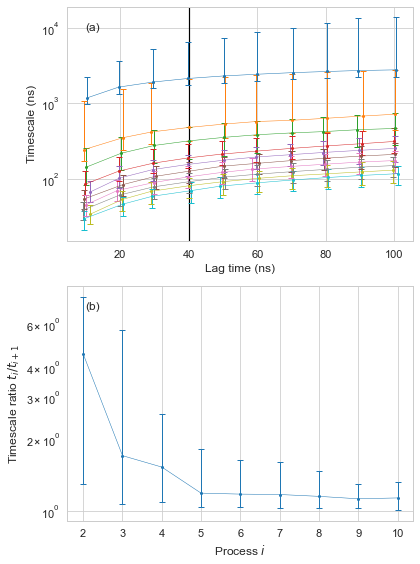

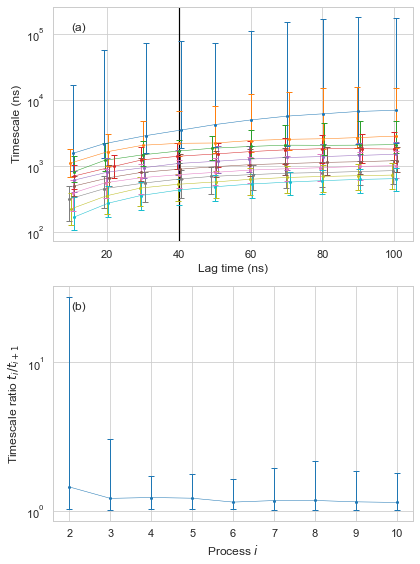

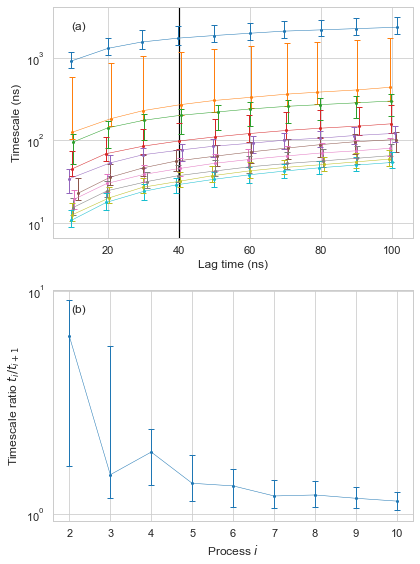

In [12]:

err_bar_kwargs = dict(lw=0.5, elinewidth=1, capsize=3, marker='o', markersize=2)
jitter_sd = 0.5

for protein in ['BBA']: #funcs.PROTEIN_LABELS[:5]+funcs.PROTEIN_LABELS[6:9]:
    
    for feat in ['dihed.', 'dist.', 'logit(dist.)']:

        for method, selection in model_selections.items(): 
            
            with sns.plotting_context('paper', font_scale=1.25):
                sns.set_style('whitegrid')

                # Setup axes
                n_rows, n_cols = 2, 1
                fig, axes = plt.subplots(n_rows, n_cols, figsize=(6, 8), sharey='row', sharex='row')
                axes = axes.reshape(2, 1)
                
                # Get hps and lag
                hp_ix = selection.loc[(selection.protein==protein) & (selection.feature==feat), 'hp_index'].values[0]
                use_lag = chosen_lags.loc[chosen_lags.protein==protein, 'lag'].values[0]

                
                # timescales
                use_ts = ts.loc[(ts.protein==protein) & (ts.hp_index == hp_ix), ['median', 'lb_diff', 'ub_diff', 'lag', 'num_its']]
                ax = axes[0, 0]
                for its in use_ts.num_its.unique():
                    x = use_ts.loc[use_ts.num_its == its, 'lag'].values 
                    x += np.random.normal(loc=0, scale=jitter_sd, size= x.shape[0])

                    y = use_ts.loc[use_ts.num_its == its, 'median'].values
                    yerr = use_ts.loc[use_ts.num_its == its, ['lb_diff', 'ub_diff']].values.T
                    ax.errorbar(x, y, yerr, **err_bar_kwargs, label=f'{int(its)}')
                    
                ax.set_yscale('log')
                ax.set_ylabel('Timescale (ns)')
                ax.set_xlabel('Lag time (ns)')
                
                # Chosen lag
                ylim = ax.get_ylim()
                ax.vlines(use_lag, *ylim, color='k', label=r'$\tau_{\mathrm{M}}$')
                ax.set_ylim(*ylim)
                
                
                # Timescale ratio
                ax = axes[1, 0]
                use_ts_ratio = ts_ratio.loc[(ts_ratio.protein==protein) & (ts_ratio.hp_index==hp_ix) & (ts_ratio.lag==use_lag), ['median', 'lb_diff', 'ub_diff', 'num_its']]
                x = use_ts_ratio['num_its'].values 
                y = use_ts_ratio['median'].values
                yerr = use_ts_ratio.loc[:, ['lb_diff', 'ub_diff']].values.T

                ax.errorbar(x, y, yerr, **err_bar_kwargs)
                ax.set_yscale('log')

                ax.set_ylabel(r'Timescale ratio $t_{i}/t_{i+1}$')
                ax.set_xlabel(r'Process $i$')




#                 h, l = axes[0, -1].get_legend_handles_labels()
#                 h = h[1:] + [h[0]]
#                 l = l[1:] + [l[0]]

# 

                for i, ax in enumerate(axes.flatten()):
                    ax.annotate(text=f"({funcs.LETTERS[i]})", xy=(0.05, 0.9), xycoords='axes fraction')

                plt.tight_layout()

                plt.savefig(funcs.FIG_DIR.joinpath('comparator_its', f'{protein}_model_{feat}_method_{method}.pdf'), bbox_inches='tight')

/var/folders/b1/0b53wj0509376104__2tttb00000gn/T/ipykernel_11895/3772357886.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(6, 6), sharey='row', sharex='row')


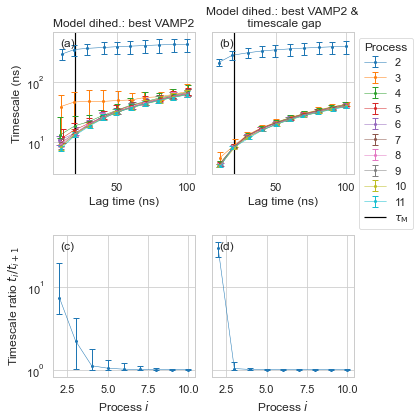

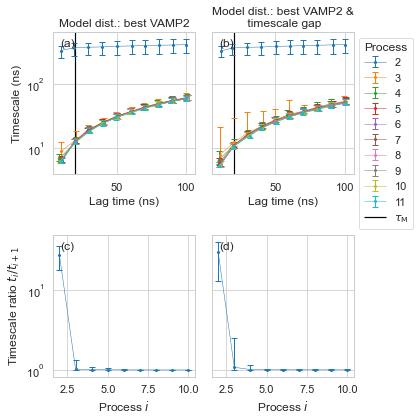

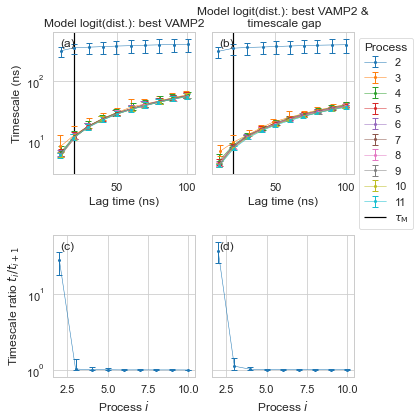

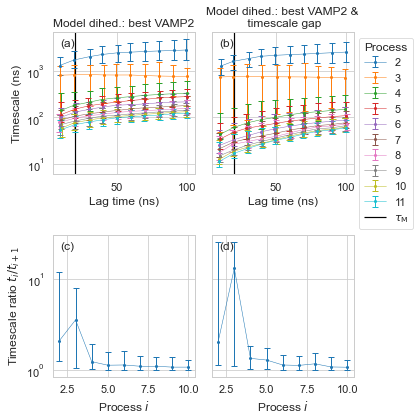

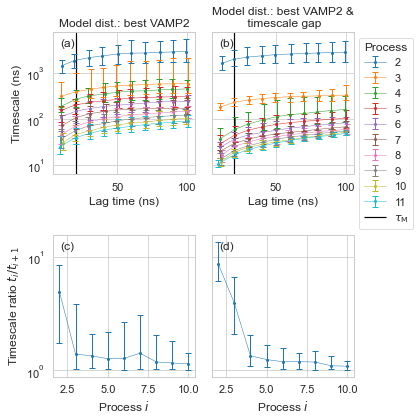

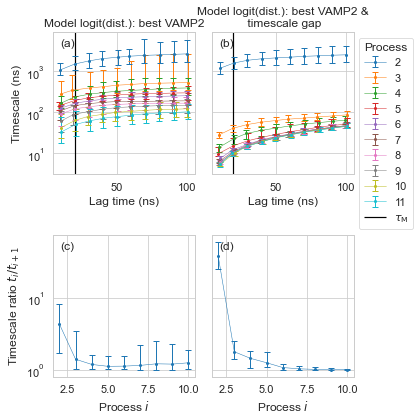

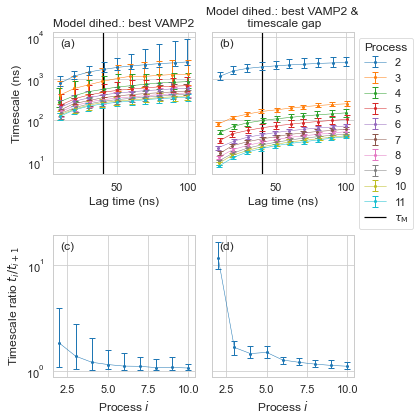

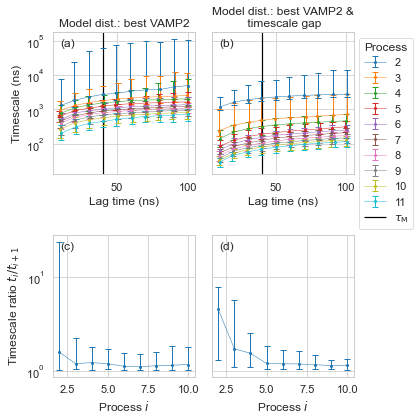

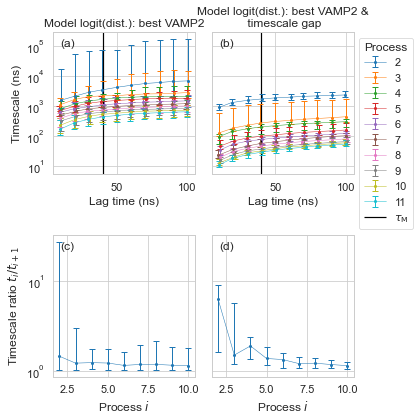

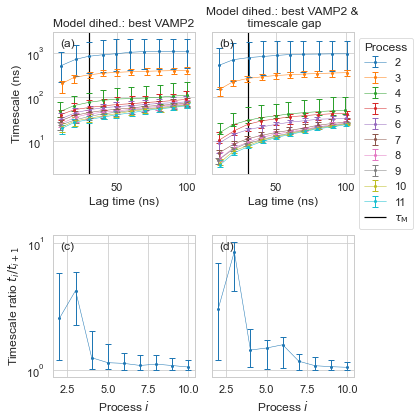

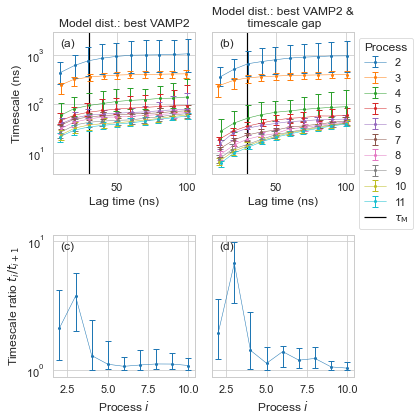

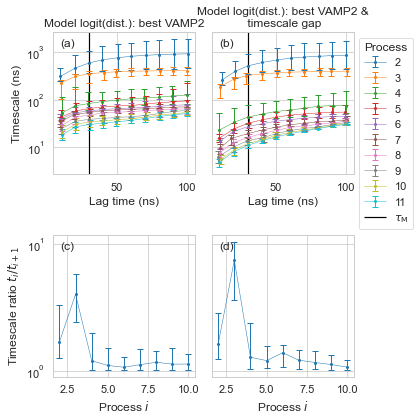

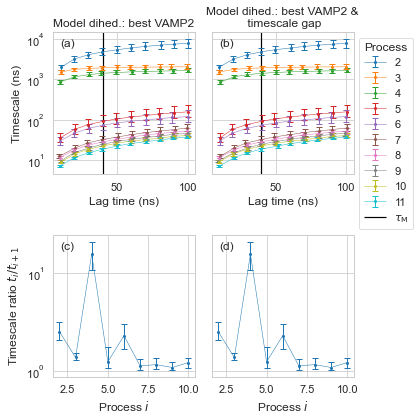

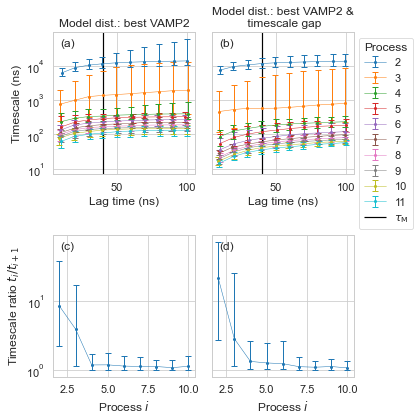

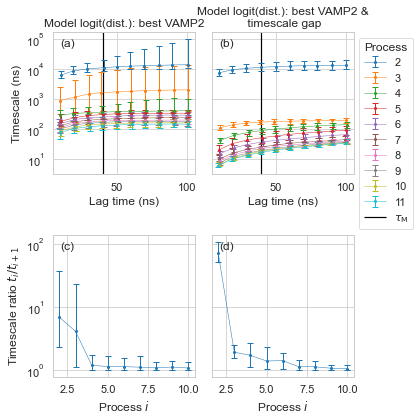

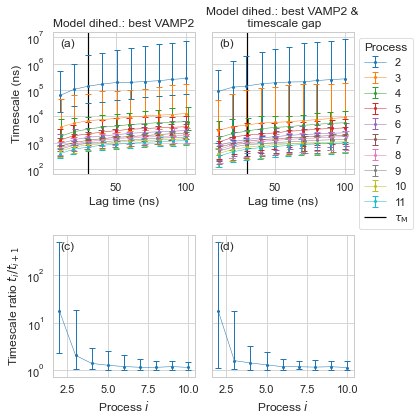

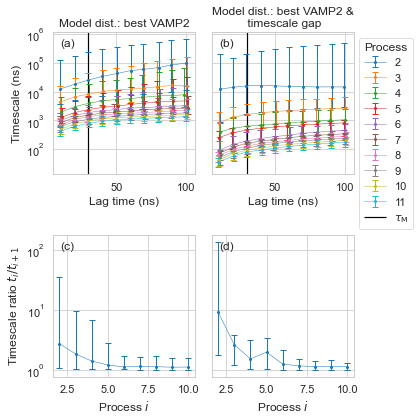

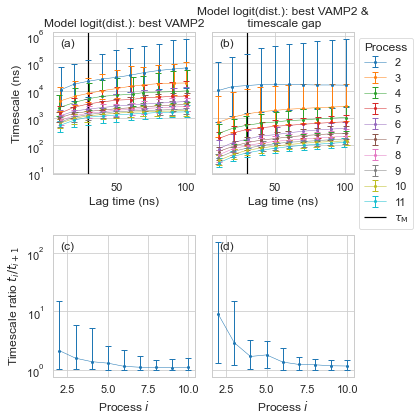

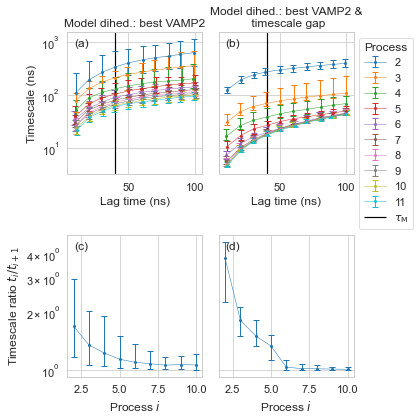

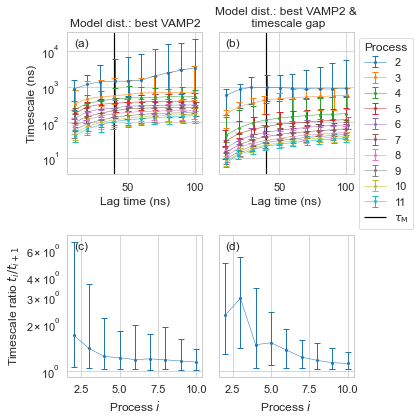

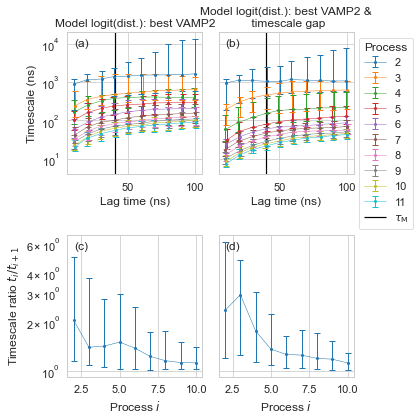

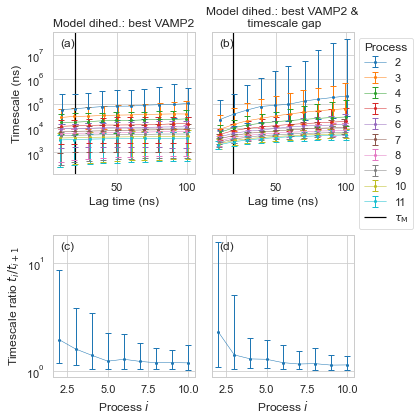

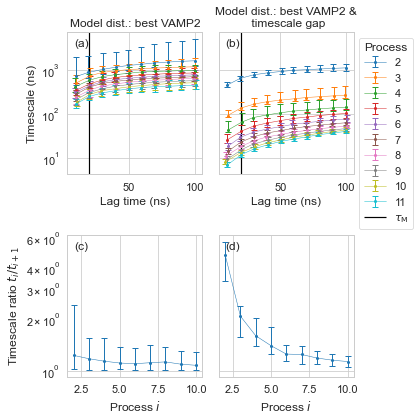

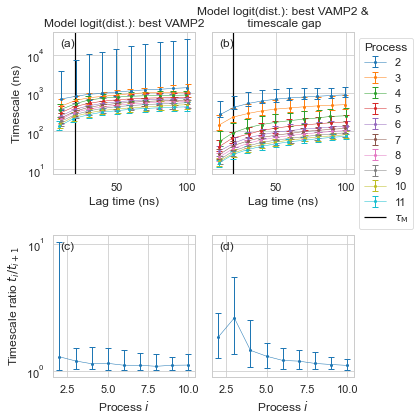

In [30]:

# err_bar_kwargs = dict(lw=0.5, elinewidth=1, capsize=3, marker='o', markersize=2)
# jitter_sd = 0.5

# for protein in funcs.PROTEIN_LABELS[:5]+funcs.PROTEIN_LABELS[6:9]:
    
#     for feat in ['dihed.', 'dist.', 'logit(dist.)']:


#         with sns.plotting_context('paper', font_scale=1.25):
#             sns.set_style('whitegrid')

#             n_rows, n_cols = 2, 2
#             fig, axes = plt.subplots(n_rows, n_cols, figsize=(6, 6), sharey='row', sharex='row')

#             hp_indices = [m1_selection.loc[(m1_selection.protein==protein) & (m1_selection.feature==feat), 'hp_index'].values[0], 
#                           m2_selection.loc[(m2_selection.protein==protein) & (m2_selection.feature==feat), 'hp_index'].values[0]]

#             use_lag = chosen_lags.loc[chosen_lags.protein==protein, 'lag'].values[0]

#             for col_ix in range(n_cols):

#                 use_ts = ts.loc[(ts.protein==protein) & (ts.hp_index == hp_indices[col_ix]), ['median', 'lb_diff', 'ub_diff', 'lag', 'num_its']]
#                 for its in use_ts.num_its.unique():
#                     x = use_ts.loc[use_ts.num_its == its, 'lag'].values 
#                     x += np.random.normal(loc=0, scale=jitter_sd, size= x.shape[0])

#                     y = use_ts.loc[use_ts.num_its == its, 'median'].values
#                     yerr = use_ts.loc[use_ts.num_its == its, ['lb_diff', 'ub_diff']].values.T
#                     axes[0, col_ix].errorbar(x, y, yerr, **err_bar_kwargs, label=f'{int(its)}')
#                 axes[0, col_ix].set_yscale('log')
#                 if col_ix == 0:
#                     axes[0, col_ix].set_ylabel('Timescale (ns)')
#                 axes[0, col_ix].set_xlabel('Lag time (ns)')


#                 use_ts_ratio = ts_ratio.loc[(ts_ratio.protein==protein) & (ts_ratio.hp_index==hp_indices[col_ix]) & (ts_ratio.lag==use_lag), ['median', 'lb_diff', 'ub_diff', 'num_its']]
#                 x = use_ts_ratio['num_its'].values 
#                 y = use_ts_ratio['median'].values
#                 yerr = use_ts_ratio.loc[:, ['lb_diff', 'ub_diff']].values.T

#                 axes[1, col_ix].errorbar(x, y, yerr, **err_bar_kwargs)
#                 axes[1, col_ix].set_yscale('log')
#                 if col_ix == 0:
#                     axes[1, col_ix].set_ylabel(r'Timescale ratio $t_{i}/t_{i+1}$')
#                 axes[1, col_ix].set_xlabel(r'Process $i$')


#             for col_ix in range(n_cols):
#                 ylim = axes[0, col_ix].get_ylim()
#                 axes[0, col_ix].vlines(use_lag, *ylim, color='k', label=r'$\tau_{\mathrm{M}}$')
#                 axes[0, col_ix].set_ylim(*ylim)

#             h, l = axes[0, -1].get_legend_handles_labels()
#             h = h[1:] + [h[0]]
#             l = l[1:] + [l[0]]

#             axes[0, -1].legend(h, l, bbox_to_anchor=(1, 1), loc='upper left', title='Process')

#             axes[0, 0].set_title(f'Model {feat}: best VAMP2')
#             axes[0, 1].set_title(f'Model {feat}: best VAMP2 &\n timescale gap')

#             for i, ax in enumerate(axes.flatten()):
#                 ax.annotate(text=f"({funcs.LETTERS[i]})", xy=(0.05, 0.9), xycoords='axes fraction')

#             plt.tight_layout()

#             plt.savefig(funcs.FIG_DIR.joinpath('comparator_its', f'{protein}_model_{feat}.pdf'), bbox_inches='tight')

In [31]:
# Figure 2

In [32]:
# for protein in funcs.PROTEIN_DIRS[:5]+funcs.PROTEIN_DIRS[6:8]:

#     model_defs = pd.read_hdf(data_dir.joinpath(protein, 'model_definitions.h5'))
#     model_defs.sort_values(by='hp_rank', inplace=True)
#     protein_fancy = model_defs.protein[0]

#     model_labels = dict(zip(model_defs['hp_index'].values, np.arange(model_defs.shape[0])+1))
#     lag = chosen_lags.loc[chosen_lags.protein==protein_fancy, 'lag'].values
#     n_dom_proc = 10 # chosen_ks.loc[chosen_ks.protein==protein_fancy, 'num_its'].values[0] + 1


#     big_ix = (timescales.protein==protein_fancy) & (timescales.hp_index.isin(model_defs.hp_index)) & (timescales.num_its <= n_dom_proc)
#     use_ts = timescales.loc[big_ix, :].copy()
#     use_ts['model'] = use_ts['hp_index'].apply(lambda x: model_labels[x])

#     with sns.plotting_context('paper', font_scale=1.25):
#         sns.set_style('whitegrid')

#         col = 'model'
#         row = 'num_its'
#         x = 'lag'
#         y = 'median'
#         hue = 'num_its'
#         df = use_ts

#         x_label = 'Lag time (ns)'
#         y_label = 'Timescale (ns)'

#         col_vals = np.sort(df[col].unique())
#         row_vals = np.sort(df[row].unique())
#         hue_vals = np.sort(df[hue].unique())
#         hues = sns.color_palette('colorblind', hue_vals.shape[0])

#         fig, axes = plt.subplots(1, col_vals.shape[0], sharey=True, sharex=True, figsize=(6, 4))
#         if axes.ndim==1:
#             axes = axes.reshape(1, -1)
            
#         i = 0
#         for j in range(col_vals.shape[0]):
#             for k in range(hue_vals.shape[0]):

#                 ix = (df[col]==col_vals[j]) & (df[row]==row_vals[i]) & (df[hue]==hue_vals[k])
#                 xx = df.loc[ix, x]
#                 yy = df.loc[ix, y]
#                 ylb = df.loc[ix, 'lb'].values
#                 yub = df.loc[ix, 'ub'].values
#                 axes[i, j].plot(xx, yy, marker='o', label=f"Eigenvector {str(hue_vals[k])}", color=hues[k])
#                 axes[i, j].fill_between(xx, ylb, yub, color=hues[k], alpha=0.5)
#                 axes[i, j].set_yscale('log')

#                 axes[i, j].set_xlabel(x_label)
#                 axes[i, j].set_title(f'Model {j+1}')

#                 if j == 0:
#                     axes[i, j].set_ylabel(y_label)



#                 axes[i, j].annotate(text=f"({i*col_vals.shape[0]+j})", xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

#         for i in range(row_vals.shape[0]):
#             ylim = axes[i, 0].get_ylim()
#             for j in range(col_vals.shape[0]):
#                     axes[i, j].vlines(lag, *ylim, label='Chosen lag', color='k')
#                     axes[i, j].set_ylim(ylim)
                                    

#         axes[0, -1].legend(bbox_to_anchor=(1, 1), loc='upper left')
                                    
#         plt.tight_layout()
#         plt.savefig(funcs.FIG_DIR.joinpath('comparator_its', f'{protein}_compbined_no_errors.pdf'), bbox_inches='tight')